# Determine Type of Distribution of Key Press

In [1]:
import pyspark
from pyspark.sql import SparkSession, types
from pyspark.sql.functions import col
import pyspark.sql.functions as F
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
spark = SparkSession.builder.master('local[*]').appName('distribution').getOrCreate()

In [3]:
df_terminals = spark.read.csv(path='./out/terminals.csv', inferSchema=True, header=True)

df_terminals = df_terminals.withColumn('Sim1', col('Sim1').cast(types.StringType()))
df_terminals= df_terminals.withColumn('Sim2', col('Sim2').cast(types.StringType()))
df_terminals = df_terminals.withColumn('LastConnectDt', F.to_timestamp('LastConnectDt'))
df_terminals = df_terminals.withColumn('Inserted', F.to_timestamp('Inserted'))
df_terminals = df_terminals.withColumn('Updated', F.to_timestamp('Updated'))

df_terminals = df_terminals.select('RecordID', 'SerialNumber', 'Enterkey', 'Zerokey', 'Swipe2', 'Swipes2ok', 'Inserts', 'Printerdots')

df_terminals.printSchema()

root
 |-- RecordID: integer (nullable = true)
 |-- SerialNumber: string (nullable = true)
 |-- Enterkey: integer (nullable = true)
 |-- Zerokey: integer (nullable = true)
 |-- Swipe2: integer (nullable = true)
 |-- Swipes2ok: integer (nullable = true)
 |-- Inserts: integer (nullable = true)
 |-- Printerdots: long (nullable = true)



### enter key distribution

In [4]:
df_enterkey = df_terminals.select('Enterkey')
ls_enterkey = [row.Enterkey for row in df_enterkey.collect()]
print(ls_enterkey[:20])

[300, 276, 48, 26196, 9613, 362916, 43716, 9913, 18464, 153275, 102, 19469, 36709, 22979, 20896, 7998, 53201, 1332, 3, 69753]


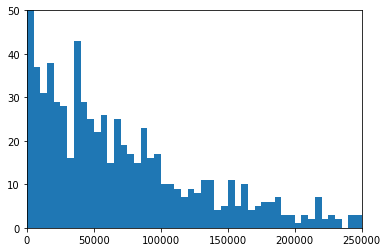

In [5]:
ls_enterkey_max = max(ls_enterkey)
bins = np.arange(0, ls_enterkey_max, 5000)

plt.xlim([0, 250000])
plt.ylim([0, 50])
plt.hist(ls_enterkey, bins=bins)
plt.show()

### zero key distribution

In [6]:
df_zerokey = df_terminals.select('Zerokey')
ls_zerokey = [row.Zerokey for row in df_zerokey.collect()]
print(ls_zerokey[:20])

[11, 6, 48, 19034, 3500, 97268, 25542, 5945, 5955, 82132, 14, 10975, 16563, 19281, 13796, 4401, 47849, 223, 3, 25846]


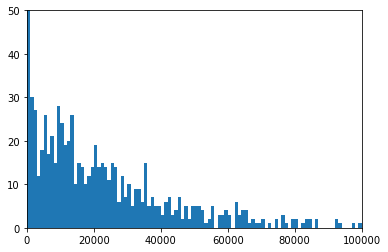

In [7]:
ls_zerokey_max = max(ls_zerokey)
bins = np.arange(0, ls_zerokey_max, 1000)

plt.xlim([0, 100000])
plt.ylim([0, 50])
plt.hist(ls_zerokey, bins=bins)
plt.show()

### swipe2 distribution

In [8]:
df_swipe2 = df_terminals.select('Swipe2')
ls_swipe2 = [row.Swipe2 for row in df_swipe2.collect()]
print(ls_swipe2[:20])

[5, 3, 38, 149, 106, 1419, 329, 123, 175, 1236, 1, 272, 71, 1572, 182, 116, 413, 4, 4, 951]


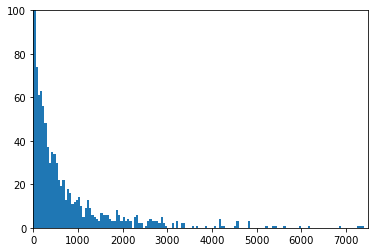

In [9]:
ls_swipe2_max = max(ls_swipe2)
bins = np.arange(0, ls_swipe2_max, 50)

plt.xlim([0, 7500])
plt.ylim([0, 100])
plt.hist(ls_swipe2, bins=bins)
plt.show()

### insert distribution

In [10]:
df_insert = df_terminals.select('Inserts')
ls_insert = [row.Inserts for row in df_insert.collect()]
print(ls_insert[:20])

[5, 3, 48, 4719, 840, 35777, 9345, 1861, 3031, 31466, 1, 3133, 6231, 5098, 4394, 1234, 12169, 13, 3, 6460]


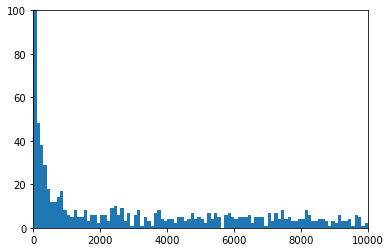

In [11]:
ls_insert_max = max(ls_insert)
bins = np.arange(0, ls_insert_max, 100)

plt.xlim([0, 10000])
plt.ylim([0, 100])
plt.hist(ls_insert, bins=bins)
plt.show()